In [1]:
# program to predict the loan status
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.columns = df.columns.str.replace(' ','_')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
# check size of dataset
df.shape

(614, 13)

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


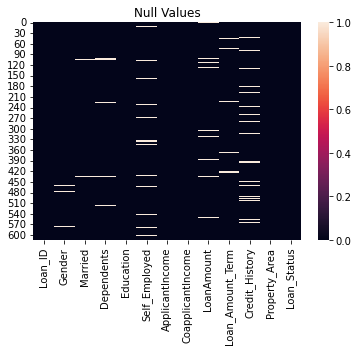

In [4]:
# check for any null values
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [5]:
# summing up total null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# deleting gender column as it is not significant for loan status prediction
del df[df.columns[1]]

In [7]:
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# getting all column names to observe type of variables
df.columns

Index(['Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [10]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [14]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
# assuming that the records with null value in married column are unmarried
df['Married'].fillna("No", inplace = True)

In [16]:
# filling null values in dependants column by using 'ffill' method
df['Dependents'].fillna(method ='ffill', inplace = True)

In [17]:
# filling null values in Self-Employed column by using 'ffill' method
df['Self_Employed'].fillna(method ='ffill', inplace = True)

In [18]:
# as 360.0 is maximum repeating value in Loan_Amount_Term cloumn so we replace null values with 360.0
df['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [19]:
# deleting recoreds with null values in Loan amount column as it cannot be anticipated
df = df.dropna(subset=['LoanAmount'])
df.reset_index()

,index,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
588,610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
589,611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
590,612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
# filling null values in Credit History column as '1' as it is maximum occuring value
df['Credit_History'].fillna(1, inplace = True)

C:\Users\Vageesh\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
# deleting gender column as it is not significant for loan status prediction
del df[df.columns[0]]

In [22]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
# summing up total null values in dataset again
df.isnull().sum().sum()

0

In [24]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.113695,0.570909,-0.048588,-0.023219
CoapplicantIncome,-0.113695,1.000000,0.188619,-0.059346,0.008944
LoanAmount,0.570909,0.188619,1.000000,0.036981,-0.001463
Loan_Amount_Term,-0.048588,-0.059346,0.036981,1.000000,0.001359
Credit_History,-0.023219,0.008944,-0.001463,0.001359,1.000000


<AxesSubplot:>

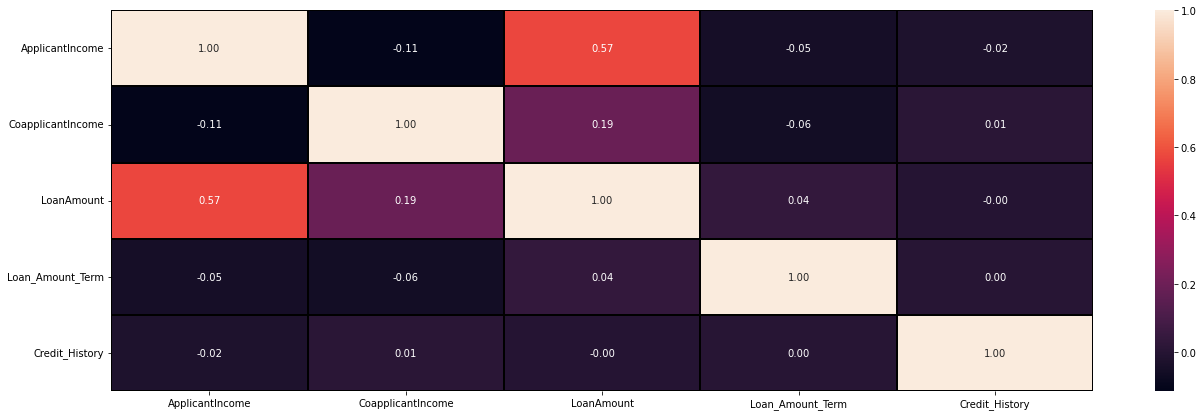

In [25]:
# checking corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [26]:
# encoding string type data to use them in plotting and making model on basis of observations
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Married'] = LE.fit_transform(df['Married'])

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/772312676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = LE.fit_transform(df['Married'])


In [27]:
LE2 = LabelEncoder()
df['Education'] = LE2.fit_transform(df['Education'])

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/2100386924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = LE2.fit_transform(df['Education'])


In [28]:
LE3 = LabelEncoder()
df['Self_Employed'] = LE3.fit_transform(df['Self_Employed'])

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/1432851915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed'] = LE3.fit_transform(df['Self_Employed'])


In [29]:
LE4 = LabelEncoder()
df['Property_Area'] = LE4.fit_transform(df['Property_Area'])

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/1304169235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_Area'] = LE4.fit_transform(df['Property_Area'])


In [30]:
LE5 = LabelEncoder()
df['Loan_Status'] = LE5.fit_transform(df['Loan_Status'])

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/865652204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status'] = LE5.fit_transform(df['Loan_Status'])


In [31]:
LE.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [32]:
# rechecking the encoding done for Eduction column for own reference
LE2.inverse_transform(df['Education'])

array(['Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate',
       'Not Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate',
       'Not Graduate', 'Graduate', 'Not Graduate', 'Not Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Not Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Not Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Not Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Not Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Not Graduate',
       'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate',
       'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate',
       'Not Graduate',

In [33]:
df['Dependents'] = df['Dependents'].replace(to_replace ="3+",value =3)

C:\Users\Vageesh\AppData\Local\Temp/ipykernel_16864/1803711652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Dependents'].replace(to_replace ="3+",value =3)


In [34]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vageesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

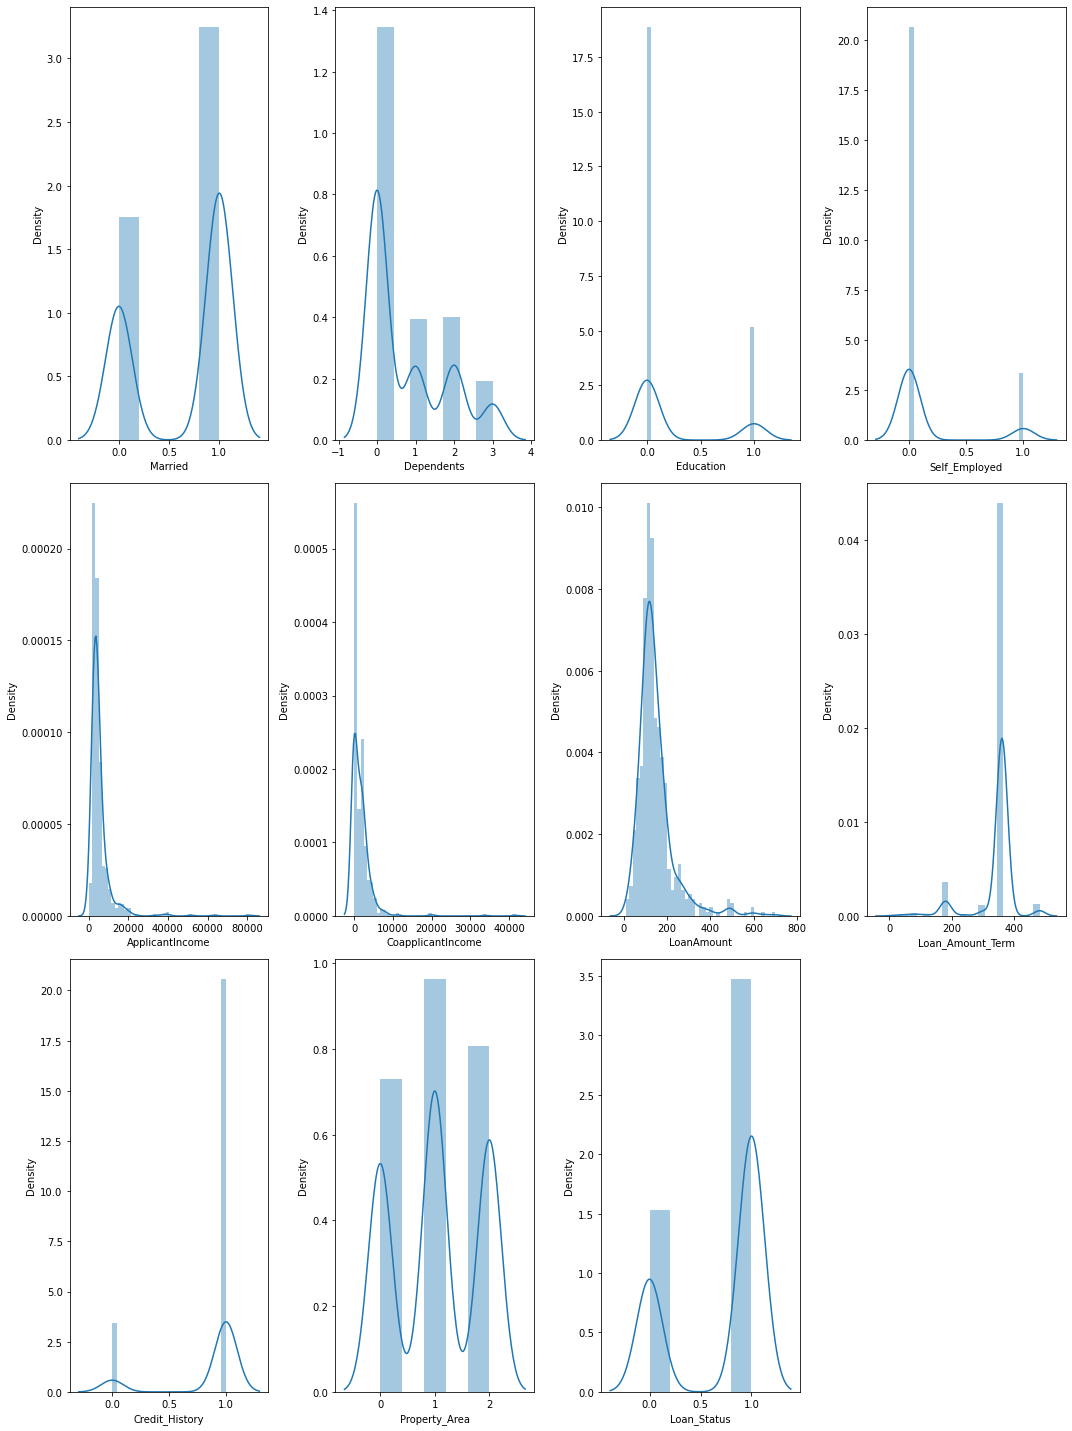

In [35]:
# plot frequency of each value in all columns
import warnings
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [36]:
# Preprocessing
# spliting dependent and independent variables on x and y axis
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [37]:
x

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [38]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 592, dtype: int32

In [39]:
y.reset_index()

,index,Loan_Status
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
587,609,1
588,610,1
589,611,1
590,612,1


In [40]:
x.reset_index()

,index,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
587,609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
588,610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
589,611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
590,612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [41]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=60)
y_train.head()

425    1
117    1
456    1
612    1
590    1
Name: Loan_Status, dtype: int32

In [42]:
# prediction by Linear Regression was not giving expected accuracy
# hyperparameter tuning for best result
grid_param = {'criterion':['gini','entropy'],
            'max_depth':range(10,15),
            'min_samples_leaf':range(2,10),
            'min_samples_split':range(3,10),
            'max_leaf_nodes':range(2,4)}

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
grid_search = GridSearchCV(estimator=clf,param_grid = grid_param,cv=5,n_jobs=-1)

grid_search.fit(x_train,y_train)

In [44]:
grid_search.fit(x_train, y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [45]:
# using decision tree to predict region
clf = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=2,min_samples_split=3, max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=2, min_samples_leaf=2,
                       min_samples_split=3)

In [46]:
y_pred = clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7696629213483146

In [48]:
import pickle
filename= 'loan_status_model.pickle'
pickle.dump(DecisionTreeClassifier,open(filename,'wb'))

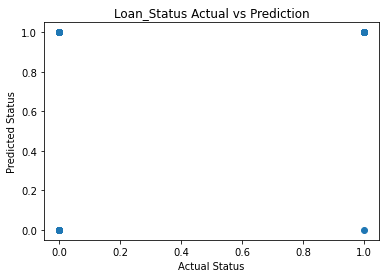

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Status')
plt.ylabel('Predicted Status')
plt.title('Loan_Status Actual vs Prediction')
plt.show()